In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import xarray as xr
import pandas as pd

%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))

%matplotlib inline

# List of available time intervals

In [2]:
bristol_model = pd.read_csv('dataset/bristol_sim_list.csv')
bristol_model

,model,time,name
0,texqe,541,541Ma
1,texqd,535,535Ma
2,texqc,530,530Ma
3,texqb,525,525Ma
4,texqa,520,520Ma
...,...,...,...
104,texpe,20,20Ma
105,texpd,15,15Ma
106,texpc,11,11Ma
107,texpb,3,3Ma


# Visualise paleo-physiography dataset

### Dataset link

Salles, T., L. Husson, M. Lorcery, B. H. Boggiani (2022). Paleo-Physiography Project, HydroShare, http://www.hydroshare.org/resource/0106c156507c4861b4cfd404022f9580


### THREDDS Data Service subset

**From 0 to 127Ma:** https://thredds.hydroshare.org/thredds/catalog/hydroshare/resources/bbf65a3ba448456b8a7f2e2bb5e59733/data/contents/catalog.html

**From 131 to 280Ma:** https://thredds.hydroshare.org/thredds/catalog/hydroshare/resources/0d90071c575f49a3b06b59066eed72fc/data/contents/catalog.html

**From 287 to 449Ma:** https://thredds.hydroshare.org/thredds/catalog/hydroshare/resources/4e77a4298bc3452989875c5ce7a00e1a/data/contents/catalog.html

**From 456Ma to 541Ma:** https://thredds.hydroshare.org/thredds/catalog/hydroshare/resources/eb9fb6eb968c414d8209216ee71dc243/data/contents/catalog.html


Plotting a specific time interval is done by specifying a time 

In [4]:
time = 240

We then load the netcdf dataset.

In [5]:
url = 'http://thredds.hydroshare.org/thredds/dodsC/hydroshare/resources/0d90071c575f49a3b06b59066eed72fc/data/contents/physio'+str(time)+'Ma.nc'
url = '../../workspace/globalBio/outputs/ncgrid/physio'+str(time)+'Ma.nc'
physio_ds = xr.open_dataset(url, chunks={'latitude': 500, 'longitude': 500})
physio_ds

<xarray.Dataset>
Dimensions:    (latitude: 3601, longitude: 7201)
Coordinates:
  * latitude   (latitude) float64 -90.0 -89.95 -89.9 -89.85 ... 89.9 89.95 90.0
  * longitude  (longitude) float64 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Data variables: (12/14)
    zsim       (latitude, longitude) float64 dask.array<chunksize=(500, 500), meta=np.ndarray>
    erorate    (latitude, longitude) float64 dask.array<chunksize=(500, 500), meta=np.ndarray>
    rain       (latitude, longitude) float64 dask.array<chunksize=(500, 500), meta=np.ndarray>
    wflux      (latitude, longitude) float64 dask.array<chunksize=(500, 500), meta=np.ndarray>
    sflux      (latitude, longitude) float64 dask.array<chunksize=(500, 500), meta=np.ndarray>
    basin      (latitude, longitude) float64 dask.array<chunksize=(500, 500), meta=np.ndarray>
    ...         ...
    z          (latitude, longitude) float64 dask.array<chunksize=(500, 500), meta=np.ndarray>
    tcor       (latitude, longitude) float64 dask.array<chunksize=(500, 500), meta=np.ndarray>
    slpcat     (latitude, longitude) float64 dask.array<chunksize=(500, 500), meta=np.ndarray>
    surfcat    (latitude, longitude) float64 dask.array<chunksize=(500, 500), meta=np.ndarray>
    hydrocat   (latitude, longitude) float64 dask.array<chunksize=(500, 500), meta=np.ndarray>
    phydiv     (latitude, longitude) float64 dask.array<chunksize=(500, 500), meta=np.ndarray>
Attributes:
    title:          240Ma Physiographic Dataset
    summary:        Parameters calculated using goSPL (the Global Scalable Pa...
    project:        Paleo-physiography reconstruction
    institution:    Faculty of Science | School of Geosciences | The Universi...
    creator_url:    http://earthcolab.org
    creator_name:   Tristan Salles
    creator_email:  tristan.salles@sydney.edu.au
    license:        CC BY-NC-SA (Creative Common) - This license allows reuse...
    date_created:   Wed Oct  5 12:05:12 2022

## Local map

For a local plot, we will use a higher resolution and slice the dataset to the region of interest:

In [6]:
min_lon = -20    # lower left longitude
min_lat = -30    # lower left latitude
max_lon = 0      # upper right longitude
max_lat = -10    # upper right latitude

# Defining region boundaries
lon_bnds = [min_lon, max_lon]
lat_bnds = [min_lat, max_lat]

# Performing the reduction
ds_clip = physio_ds.sel(latitude=slice(*lat_bnds), longitude=slice(*lon_bnds))
ds_clip

<xarray.Dataset>
Dimensions:    (latitude: 401, longitude: 401)
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.95 -29.9 ... -10.1 -10.05 -10.0
  * longitude  (longitude) float64 -20.0 -19.95 -19.9 -19.85 ... -0.1 -0.05 0.0
Data variables: (12/14)
    zsim       (latitude, longitude) float64 dask.array<chunksize=(300, 300), meta=np.ndarray>
    erorate    (latitude, longitude) float64 dask.array<chunksize=(300, 300), meta=np.ndarray>
    rain       (latitude, longitude) float64 dask.array<chunksize=(300, 300), meta=np.ndarray>
    wflux      (latitude, longitude) float64 dask.array<chunksize=(300, 300), meta=np.ndarray>
    sflux      (latitude, longitude) float64 dask.array<chunksize=(300, 300), meta=np.ndarray>
    basin      (latitude, longitude) float64 dask.array<chunksize=(300, 300), meta=np.ndarray>
    ...         ...
    z          (latitude, longitude) float64 dask.array<chunksize=(300, 300), meta=np.ndarray>
    tcor       (latitude, longitude) float64 dask.array<chunksize=(300, 300), meta=np.ndarray>
    slpcat     (latitude, longitude) float64 dask.array<chunksize=(300, 300), meta=np.ndarray>
    surfcat    (latitude, longitude) float64 dask.array<chunksize=(300, 300), meta=np.ndarray>
    hydrocat   (latitude, longitude) float64 dask.array<chunksize=(300, 300), meta=np.ndarray>
    phydiv     (latitude, longitude) float64 dask.array<chunksize=(300, 300), meta=np.ndarray>
Attributes:
    title:          240Ma Physiographic Dataset
    summary:        Parameters calculated using goSPL (the Global Scalable Pa...
    project:        Paleo-physiography reconstruction
    institution:    Faculty of Science | School of Geosciences | The Universi...
    creator_url:    http://earthcolab.org
    creator_name:   Tristan Salles
    creator_email:  tristan.salles@sydney.edu.au
    license:        CC BY-NC-SA (Creative Common) - This license allows reuse...
    date_created:   Wed Oct  5 12:05:12 2022

In [7]:
clipflux = xr.where(ds_clip.wflux > 2, ds_clip.wflux, np.nan)

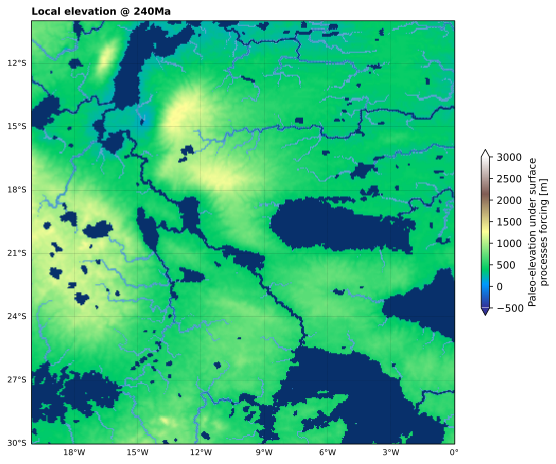

In [15]:
cbar_kwargs = {'orientation':'vertical', 'shrink':0.3}
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(), aspect='auto')
ds_clip.z.plot.imshow(ax=ax, transform=ccrs.PlateCarree(),
                x='longitude', y='latitude',
                robust=True, vmin=-500, vmax=3000,
                cmap='terrain',
                cbar_kwargs=cbar_kwargs,
                add_colorbar=True,
                extend='both')

clipflux.plot.imshow(ax=ax, transform=ccrs.PlateCarree(),
                x='longitude', y='latitude',
                robust=True, vmin=-50, vmax=50,
                cmap='Blues',
                add_colorbar=False,
                extend='both')

cnplot = ax.contour(ds_clip.longitude, ds_clip.latitude, ds_clip.z,
                        linewidths=1.5,
                        colors='k',
                        levels=[0], 
                        transform=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

ax.set_title('Local elevation @ '+str(time)+'Ma', fontsize=10, fontweight="bold", loc='left')
plt.tight_layout()
plt.show()

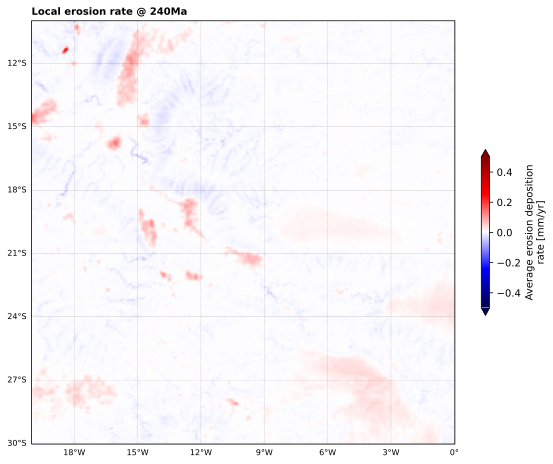

In [9]:
cbar_kwargs = {'orientation':'vertical', 'shrink':0.3}
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(), aspect='auto')
ds_clip.erorate.plot.imshow(ax=ax, transform=ccrs.PlateCarree(),
                x='longitude', y='latitude',
                robust=True, vmin=-0.5, vmax=0.5,
                cmap='seismic',
                cbar_kwargs=cbar_kwargs,
                add_colorbar=True,
                extend='both')

cnplot = ax.contour(ds_clip.longitude, ds_clip.latitude, ds_clip.z,
                        linewidths=1.5,
                        colors='k',
                        levels=[0], 
                        transform=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

ax.set_title('Local erosion rate @ '+str(time)+'Ma', fontsize=10, fontweight="bold", loc='left')
plt.tight_layout()
plt.show()

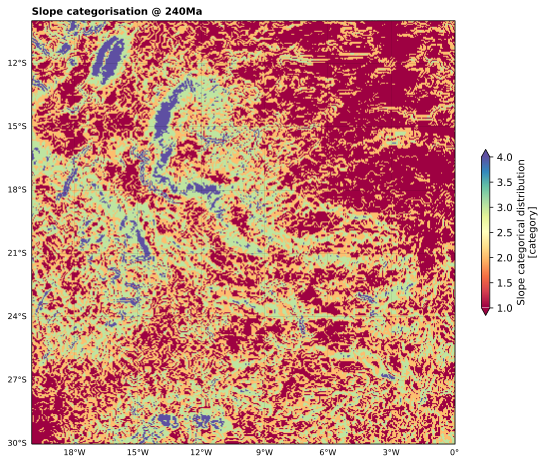

In [10]:
cbar_kwargs = {'orientation':'vertical', 'shrink':0.3}
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(), aspect='auto')
ds_clip.slpcat.plot.imshow(ax=ax, transform=ccrs.PlateCarree(),
                x='longitude', y='latitude',
                robust=True,  #vmin=5, vmax=50,
                cmap='Spectral',
                cbar_kwargs=cbar_kwargs,
                add_colorbar=True,
                extend='both')

cnplot = ax.contour(ds_clip.longitude, ds_clip.latitude, ds_clip.z,
                        linewidths=1.5,
                        colors='k',
                        levels=[0], 
                        transform=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

ax.set_title('Slope categorisation @ '+str(time)+'Ma', fontsize=10, fontweight="bold", loc='left')
plt.tight_layout()
plt.show()

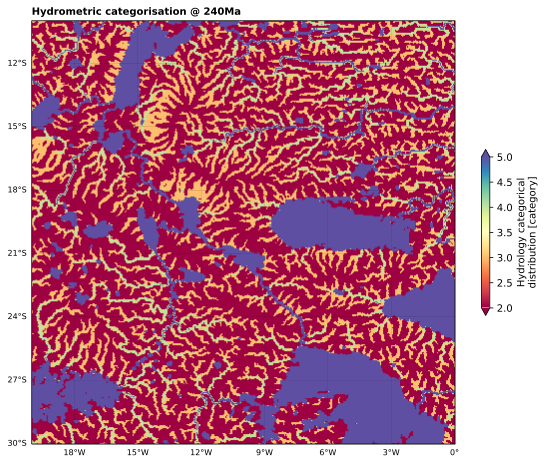

In [11]:
cbar_kwargs = {'orientation':'vertical', 'shrink':0.3}
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(), aspect='auto')
ds_clip.hydrocat.plot.imshow(ax=ax, transform=ccrs.PlateCarree(),
                x='longitude', y='latitude',
                robust=True,  #vmin=5, vmax=50,
                cmap='Spectral',
                cbar_kwargs=cbar_kwargs,
                add_colorbar=True,
                extend='both')

cnplot = ax.contour(ds_clip.longitude, ds_clip.latitude, ds_clip.z,
                        linewidths=1.5,
                        colors='k',
                        levels=[0], 
                        transform=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

ax.set_title('Hydrometric categorisation @ '+str(time)+'Ma', fontsize=10, fontweight="bold", loc='left')
plt.tight_layout()
plt.show()

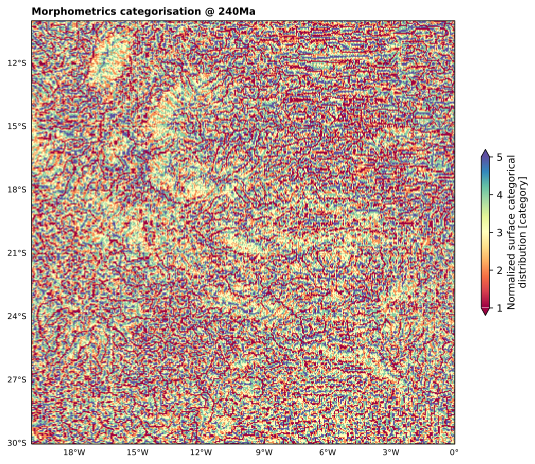

In [12]:
cbar_kwargs = {'orientation':'vertical', 'shrink':0.3}
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(), aspect='auto')
ds_clip.surfcat.plot.imshow(ax=ax, transform=ccrs.PlateCarree(),
                x='longitude', y='latitude',
                robust=True,  #vmin=5, vmax=50,
                cmap='Spectral',
                cbar_kwargs=cbar_kwargs,
                add_colorbar=True,
                extend='both')

cnplot = ax.contour(ds_clip.longitude, ds_clip.latitude, ds_clip.z,
                        linewidths=1.5,
                        colors='k',
                        levels=[0], 
                        transform=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

ax.set_title('Morphometrics categorisation @ '+str(time)+'Ma', fontsize=10, fontweight="bold", loc='left')
plt.tight_layout()
plt.show()

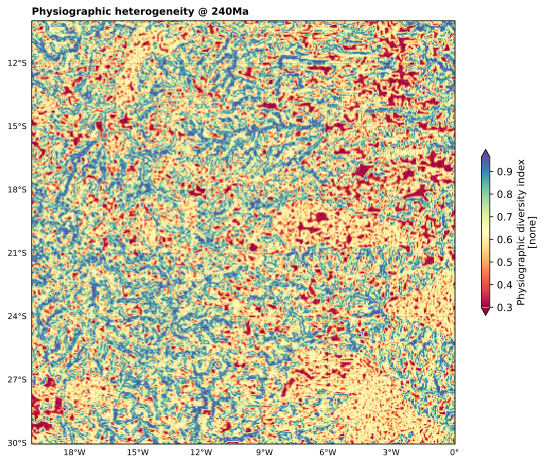

In [13]:
cbar_kwargs = {'orientation':'vertical', 'shrink':0.3}
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(), aspect='auto')
ds_clip.phydiv.plot.imshow(ax=ax, transform=ccrs.PlateCarree(),
                x='longitude', y='latitude',
                robust=True,  #vmin=5, vmax=50,
                cmap='Spectral',
                cbar_kwargs=cbar_kwargs,
                add_colorbar=True,
                extend='both')

cnplot = ax.contour(ds_clip.longitude, ds_clip.latitude, ds_clip.z,
                        linewidths=1.5,
                        colors='k',
                        levels=[0], 
                        transform=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

ax.set_title('Physiographic heterogeneity @ '+str(time)+'Ma', fontsize=10, fontweight="bold", loc='left')
plt.tight_layout()
plt.show()